## Introdução 
Curso focado na análise exploratória de dados, utilizando a linguagem Python e  biblioteca Seaborn

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('tips.csv')

In [3]:
df.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [4]:
linhas, colunas = df.shape

In [5]:
linhas

244

In [6]:
colunas 

6

### Renomeando

In [7]:
df.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [8]:
df.rename(columns={'total_bill': 'valor_da_conta', 'tip' : 'gorjeta',
                   'dessert': 'sobremesa', 'day': 'dia', 'time': 'periodo', 'size' :'pessoas'}, inplace=True)

In [9]:
df.head()

,valor_da_conta,gorjeta,sobremesa,dia,periodo,pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [10]:
df.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [11]:
df['sobremesa'] = df.sobremesa.map({
    'Yes': 'Sim',
    'No' : 'Nao'
})

In [12]:
df.periodo.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [13]:
df.periodo = df['periodo'] = df.periodo.map({
    'Dinner': 'Jantar',
    'Lunch' : 'Almoco'
})

In [14]:
df.dia.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [15]:
df.dia = df.dia.map({
    'Sun': 'Domingo',
    'Sat' : 'Sabado',
    'Thur' : 'Quinta',
    'Fri' : 'Sexta'
    
})

In [16]:
df.head()

,valor_da_conta,gorjeta,sobremesa,dia,periodo,pessoas
0,16.99,1.01,Nao,Domingo,Jantar,2
1,10.34,1.66,Nao,Domingo,Jantar,3
2,21.01,3.50,Nao,Domingo,Jantar,3
3,23.68,3.31,Nao,Domingo,Jantar,2
4,24.59,3.61,Nao,Domingo,Jantar,4


### Gráficos

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df.count()

valor_da_conta    244
gorjeta           244
sobremesa         244
dia               244
periodo           244
pessoas           244
dtype: int64

In [19]:
df.isnull().sum()

valor_da_conta    0
gorjeta           0
sobremesa         0
dia               0
periodo           0
pessoas           0
dtype: int64

In [20]:
df.head()

,valor_da_conta,gorjeta,sobremesa,dia,periodo,pessoas
0,16.99,1.01,Nao,Domingo,Jantar,2
1,10.34,1.66,Nao,Domingo,Jantar,3
2,21.01,3.50,Nao,Domingo,Jantar,3
3,23.68,3.31,Nao,Domingo,Jantar,2
4,24.59,3.61,Nao,Domingo,Jantar,4


#### 1 - Quanto maior a conta, maior a gorjeta?

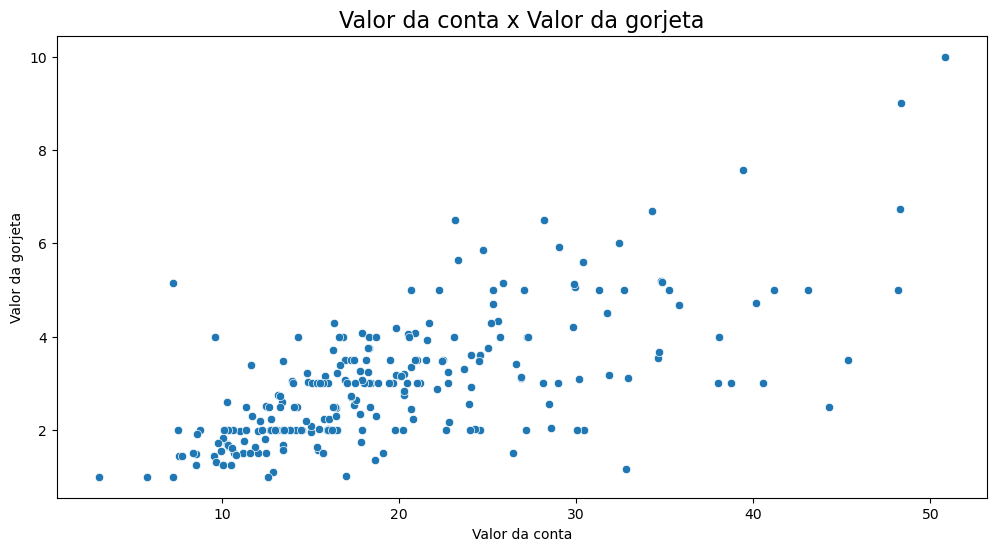

In [21]:
plt.figure(figsize = (12, 6))
ax = sns.scatterplot(data= df, x= 'valor_da_conta', y= 'gorjeta')
ax.set_xlabel("Valor da conta")
ax.set_ylabel("Valor da gorjeta")
ax.set_title('Valor da conta x Valor da gorjeta', fontsize = 16)
plt.show()

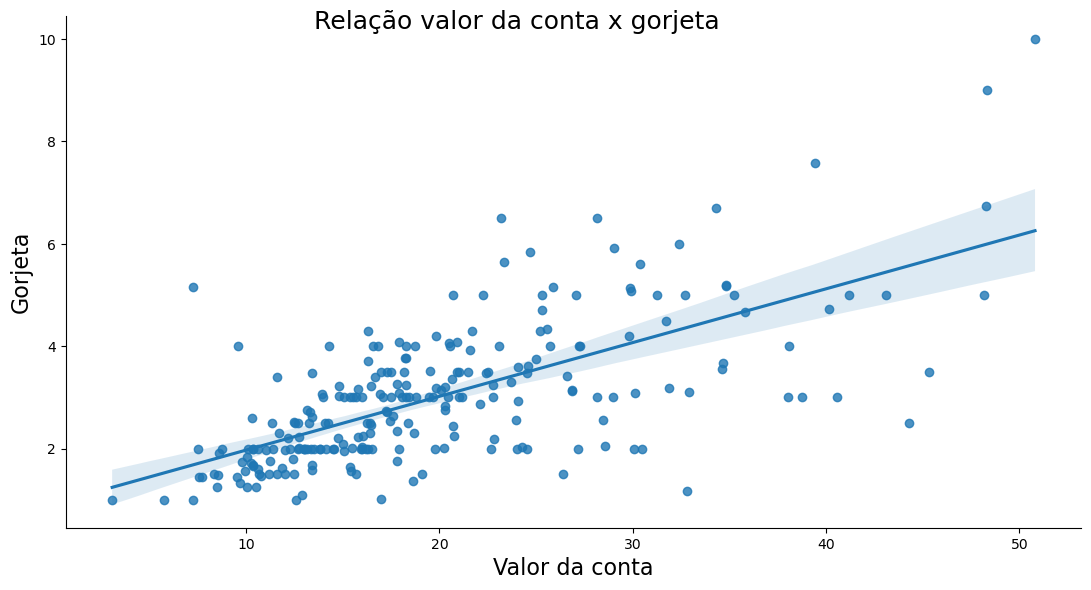

In [22]:
ax = sns.lmplot(data = df, x = 'valor_da_conta', y ='gorjeta')
ax.figure.set_size_inches(12, 6)
ax.figure.suptitle("Relação valor da conta x gorjeta", fontsize = 18)
ax.set_ylabels('Gorjeta', fontsize = 16)
ax.set_xlabels('Valor da conta', fontsize = 16)

plt.show()

- Visualmente, há uma reta linear. Ou seja, quanto maior o valor da conta, maior a gorjeta.
---

#### Campo porcentagem

In [23]:
df['porcentagem'] = ((df['gorjeta'] / df['valor_da_conta'])*100).round(0)
df.head()

,valor_da_conta,gorjeta,sobremesa,dia,periodo,pessoas,porcentagem
0,16.99,1.01,Nao,Domingo,Jantar,2,6.0
1,10.34,1.66,Nao,Domingo,Jantar,3,16.0
2,21.01,3.50,Nao,Domingo,Jantar,3,17.0
3,23.68,3.31,Nao,Domingo,Jantar,2,14.0
4,24.59,3.61,Nao,Domingo,Jantar,4,15.0


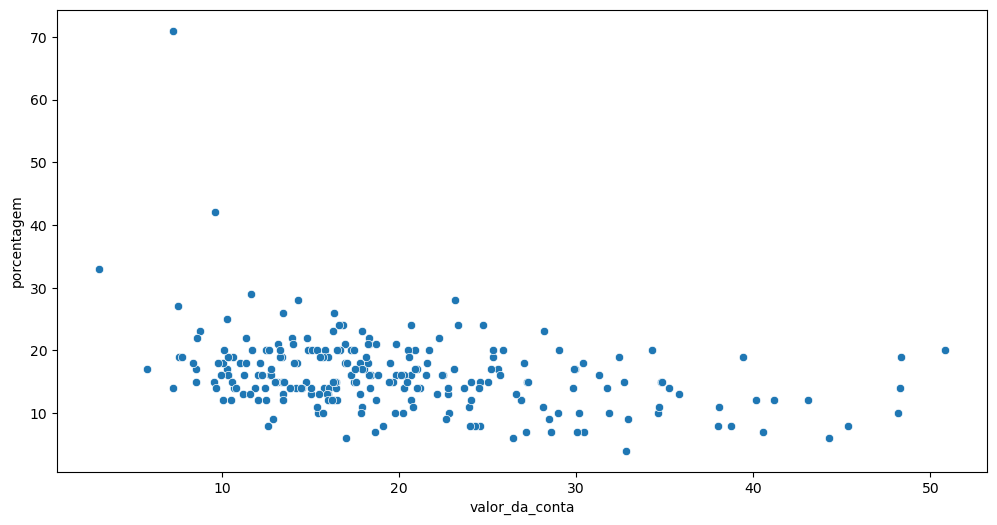

In [24]:
plt.figure(figsize=(12,6))
ax = sns.scatterplot(data= df, x = 'valor_da_conta', y= 'porcentagem')

plt.show()


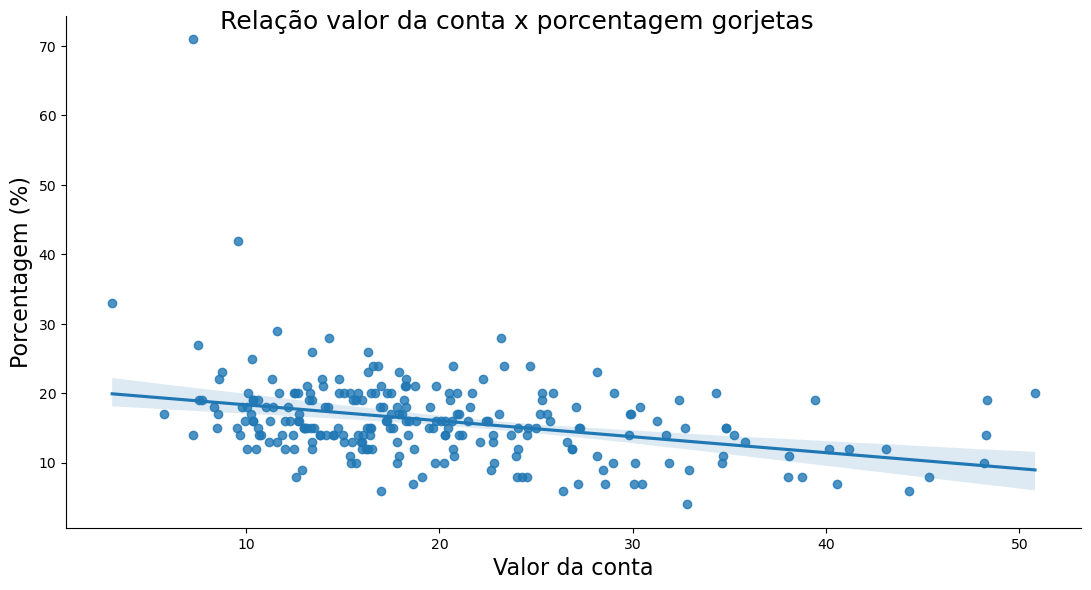

In [25]:
ax= sns.lmplot(data= df, x = 'valor_da_conta', y ='porcentagem')
ax.figure.set_size_inches(12, 6)
ax.set_ylabels('Porcentagem (%)', fontsize = 16)
ax.set_xlabels("Valor da conta", fontsize = 16)
ax.fig.suptitle("Relação valor da conta x porcentagem gorjetas", fontsize = 18)
plt.show()

- Analisando a reta, o vaor da gorjeta aumenta conforme a conta aumenta. Porém esse aumento não é proporcional.
---


### Relplot
Doc: https://seaborn.pydata.org/generated/seaborn.relplot.html

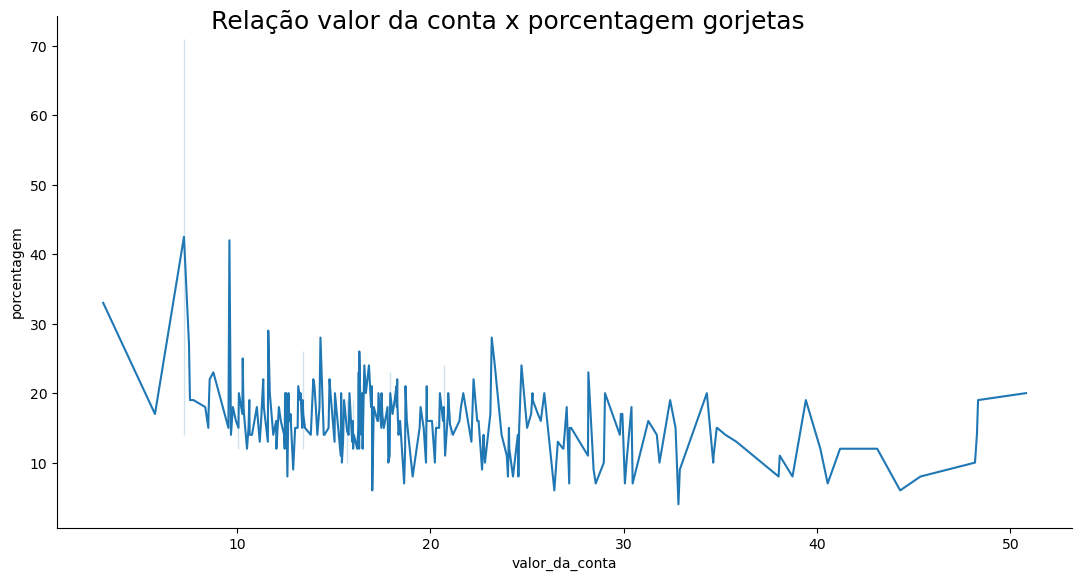

In [26]:
ax = sns.relplot(data = df, x ='valor_da_conta', y = 'porcentagem', kind= 'line')
ax.fig.suptitle("Relação valor da conta x porcentagem gorjetas", fontsize = 18)
ax.figure.set_size_inches(12, 6)
plt.show()

In [184]:
sns.set_palette('Blues_r')
sns.set_style('ticks')
#pallete = 'Blues_r'

## Análise 2

In [27]:
df[df.sobremesa == 'Sim']

,valor_da_conta,gorjeta,sobremesa,dia,periodo,pessoas,porcentagem
56,38.01,3.00,Sim,Sabado,Jantar,4,8.0
58,11.24,1.76,Sim,Sabado,Jantar,2,16.0
60,20.29,3.21,Sim,Sabado,Jantar,2,16.0
61,13.81,2.00,Sim,Sabado,Jantar,2,14.0
62,11.02,1.98,Sim,Sabado,Jantar,2,18.0
...,...,...,...,...,...,...,...
234,15.53,3.00,Sim,Sabado,Jantar,2,19.0
236,12.60,1.00,Sim,Sabado,Jantar,2,8.0
237,32.83,1.17,Sim,Sabado,Jantar,2,4.0
240,27.18,2.00,Sim,Sabado,Jantar,2,7.0


In [28]:
df[df.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,16.322581
std,9.832154,1.401468,0.810751,8.505959
min,3.070000,1.000000,1.000000,4.000000
25%,13.420000,2.000000,2.000000,11.000000
50%,17.920000,3.000000,2.000000,15.000000
75%,26.860000,3.680000,3.000000,20.000000
max,50.810000,10.000000,5.000000,71.000000


In [30]:
df[df.sobremesa == 'Nao'].describe()

,valor_da_conta,gorjeta,pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,15.953642
std,8.255582,1.377190,1.017984,3.988881
min,7.250000,1.000000,1.000000,6.000000
25%,13.325000,2.000000,2.000000,14.000000
50%,17.590000,2.740000,2.000000,16.000000
75%,22.755000,3.505000,3.000000,18.500000
max,48.330000,9.000000,6.000000,29.000000


In [35]:
df[df.valor_da_conta == 48.33]

,valor_da_conta,gorjeta,sobremesa,dia,periodo,pessoas,porcentagem
212,48.33,9.0,Nao,Sabado,Jantar,4,19.0


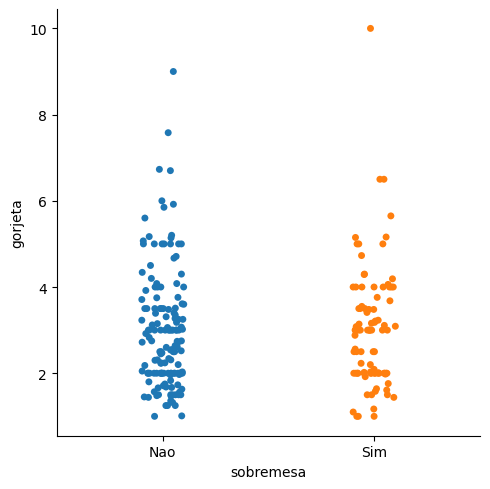

In [38]:
ax = sns.catplot(x = 'sobremesa', y ='gorjeta', data= df)
plt.show()

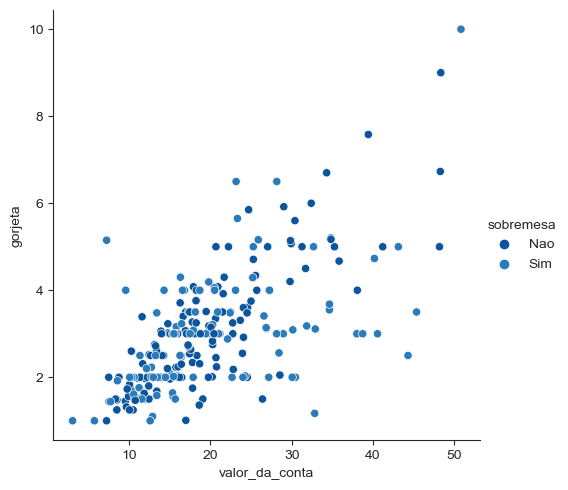

In [187]:
ax = sns.relplot(x= 'valor_da_conta', y ='gorjeta', hue = 'sobremesa', data = df)
plt.show()

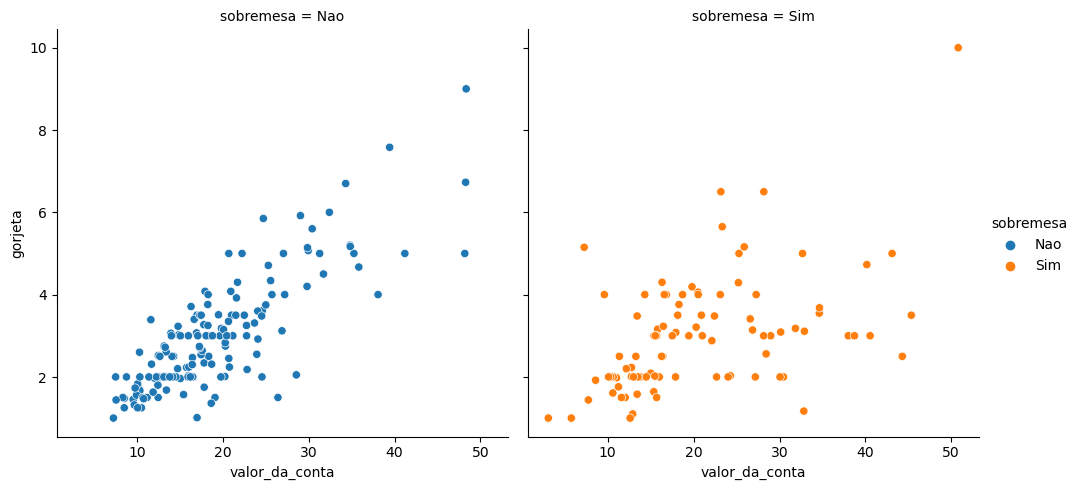

In [50]:
ax = sns.relplot(x= 'valor_da_conta', y ='gorjeta', hue = 'sobremesa', col = 'sobremesa', data = df, )
plt.show()

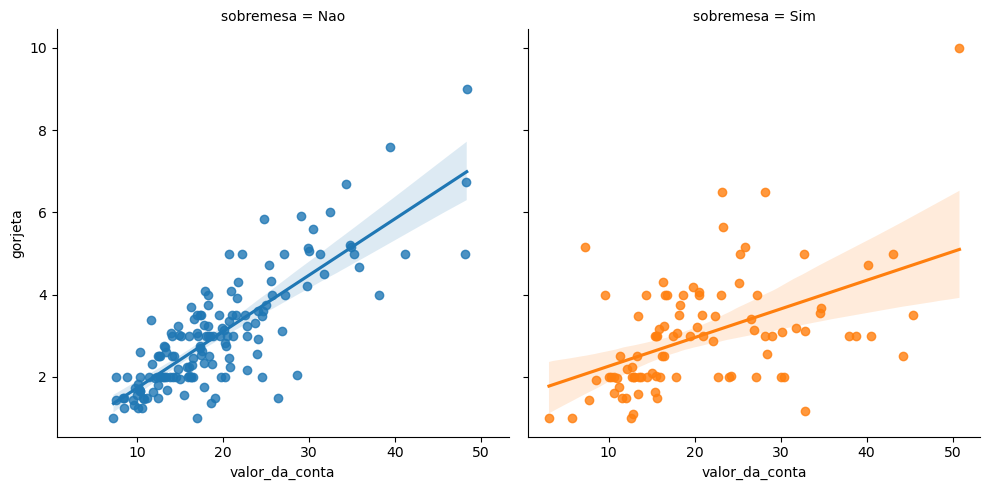

In [53]:
sns.lmplot(x= 'valor_da_conta', y ='gorjeta', col = 'sobremesa', hue = 'sobremesa', data = df)
plt.show()

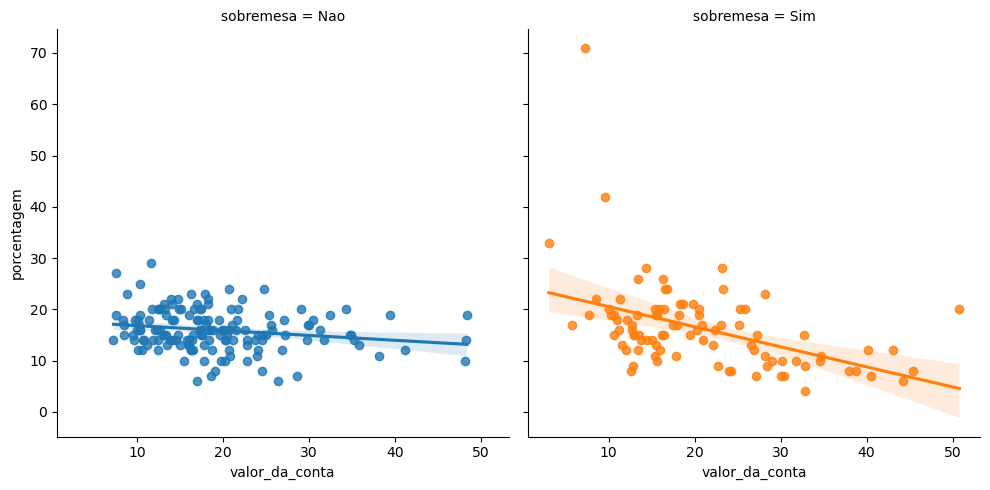

In [56]:
sns.lmplot(x= 'valor_da_conta', y ='porcentagem', col = 'sobremesa', hue = 'sobremesa', data = df)
plt.show()

* Existe uma diferença do valor (visualmente) da gorjeta dos clientes que optaram por sobremesa e não.

---

### Teste de hipótese

 $H0$: A distribuição da taxa da gorjeta é a mesma nos dois grupos (com e sem sobremesa)

 $H1$: A distribuição da taxa da gorjeta não é a mesma nos dois grupos (com e sem sobremesa)

In [58]:
from scipy.stats import ranksums

In [65]:
sobremesa = df.query("sobremesa == 'Sim'").porcentagem
sobremesa

56      8.0
58     16.0
60     16.0
61     14.0
62     18.0
       ... 
234    19.0
236     8.0
237     4.0
240     7.0
241     9.0
Name: porcentagem, Length: 93, dtype: float64

In [66]:
sem_sobremesa = df.query("sobremesa == 'Nao'").porcentagem
sem_sobremesa

0       6.0
1      16.0
2      17.0
3      14.0
4      15.0
       ... 
235    12.0
238    13.0
239    20.0
242    10.0
243    16.0
Name: porcentagem, Length: 151, dtype: float64

In [74]:
r = ranksums(sobremesa, sem_sobremesa)
r

RanksumsResult(statistic=-0.6331073145314825, pvalue=0.5266635660124415)

Para aceitar a hipótese alternativa, o <b>$p_value$</b> deve ser menor que 0.05 ou 5%.
Assim sendo, a hipótese alternativa é rejeitada e a hipótese nula é aceita. Não há muita diferenciação entre os grupos.

In [73]:
print(f'O valoor do p_value é {round(r.pvalue, 3)*100}%')

O valoor do p_value é 52.7%


* A distribuição da taxa de gorjeta é a mesma para os dois grupos.

---


## Análise 3 - Dia da semana

In [75]:
df.head()

,valor_da_conta,gorjeta,sobremesa,dia,periodo,pessoas,porcentagem
0,16.99,1.01,Nao,Domingo,Jantar,2,6.0
1,10.34,1.66,Nao,Domingo,Jantar,3,16.0
2,21.01,3.50,Nao,Domingo,Jantar,3,17.0
3,23.68,3.31,Nao,Domingo,Jantar,2,14.0
4,24.59,3.61,Nao,Domingo,Jantar,4,15.0


In [76]:
df.dia.unique()

array(['Domingo', 'Sabado', 'Quinta', 'Sexta'], dtype=object)

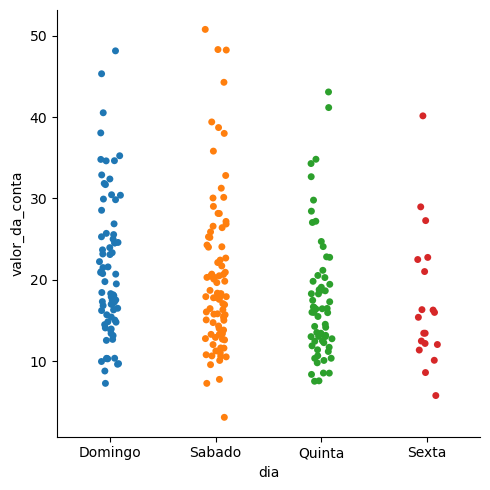

In [79]:
ax = sns.catplot(x= 'dia', y ='valor_da_conta', data = df)
plt.show()

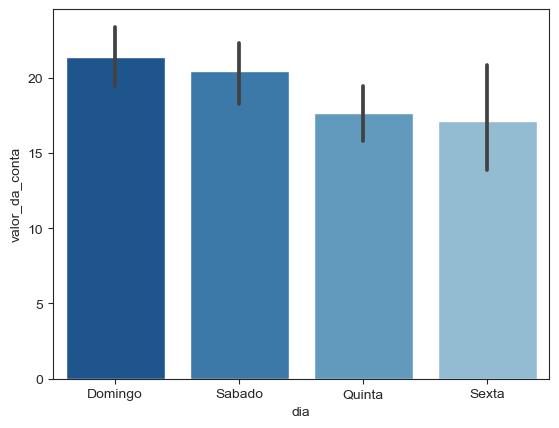

In [188]:
ax = sns.barplot(x= 'dia', y ='valor_da_conta', data = df)
plt.show()

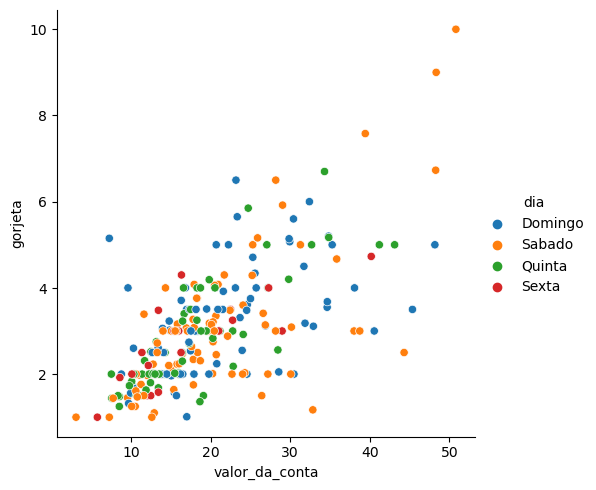

In [87]:
ax = sns.relplot(x= 'valor_da_conta', y ='gorjeta', hue='dia', data = df)
plt.show()

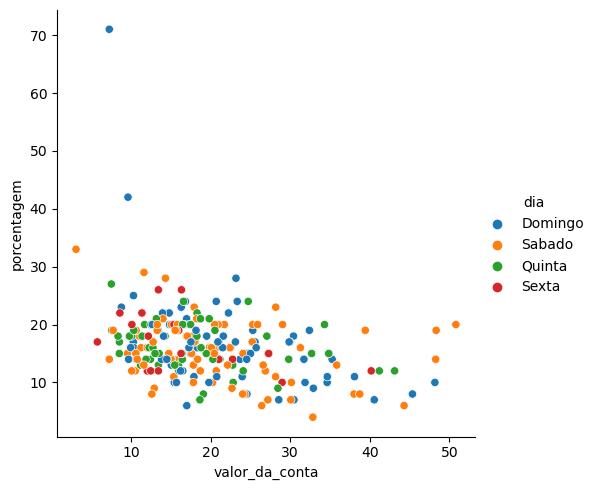

In [89]:
ax = sns.relplot(x= 'valor_da_conta', y ='porcentagem',  hue='dia', data = df)
plt.show()

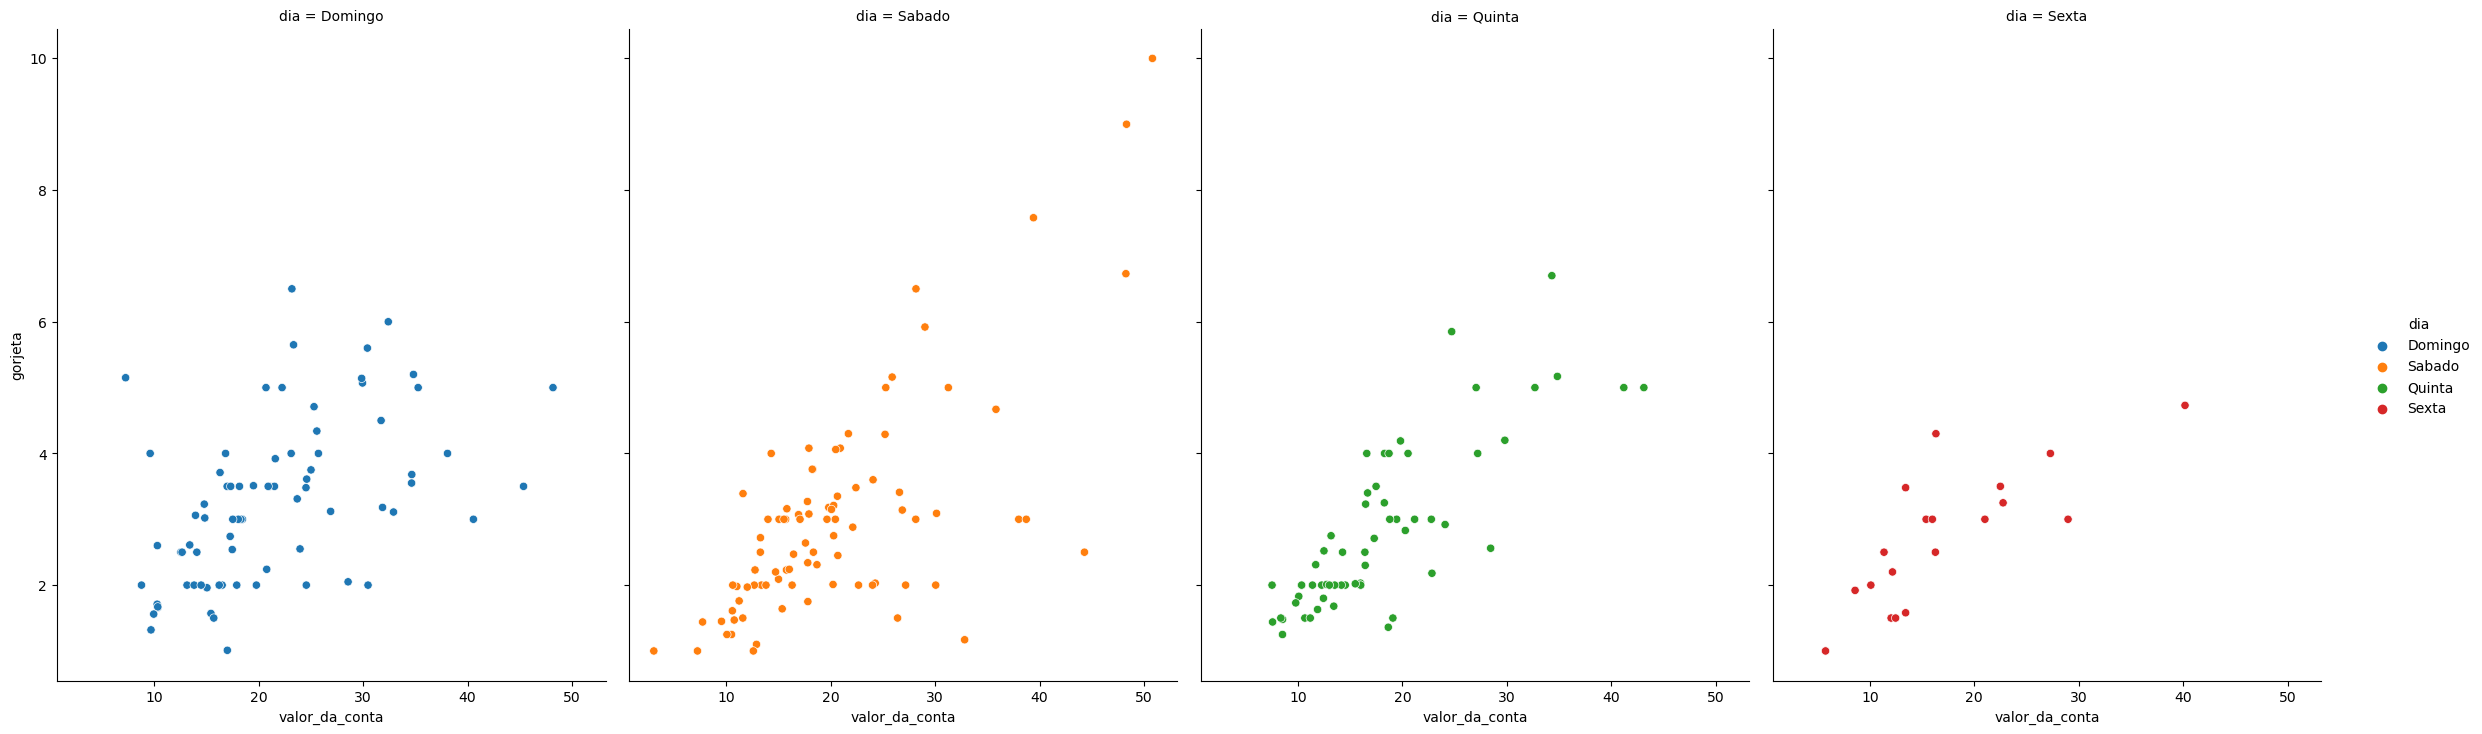

In [98]:
ax = sns.relplot(x= 'valor_da_conta', y ='gorjeta', col = 'dia', hue='dia', data = df)
ax.figure.set_size_inches(25, 8)
plt.show()

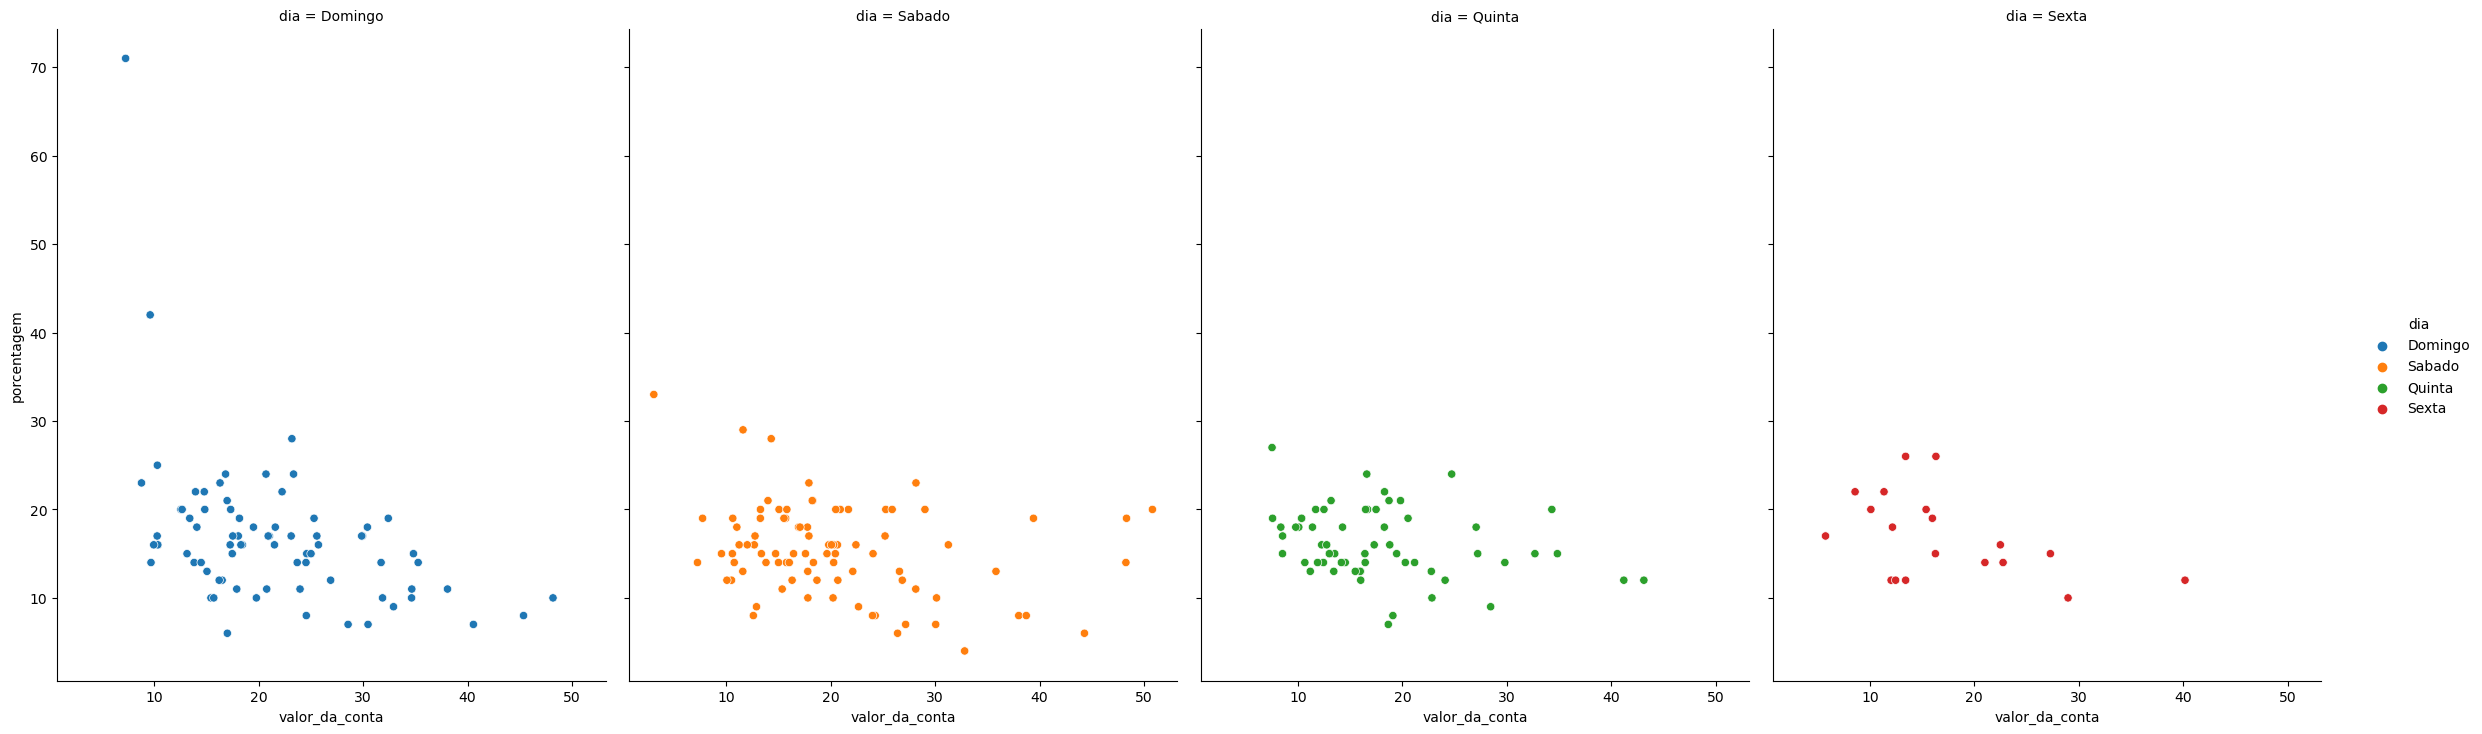

In [99]:
ax = sns.relplot(x= 'valor_da_conta', y ='porcentagem', col = 'dia', hue='dia', data = df)
ax.figure.set_size_inches(25, 8)
plt.show()

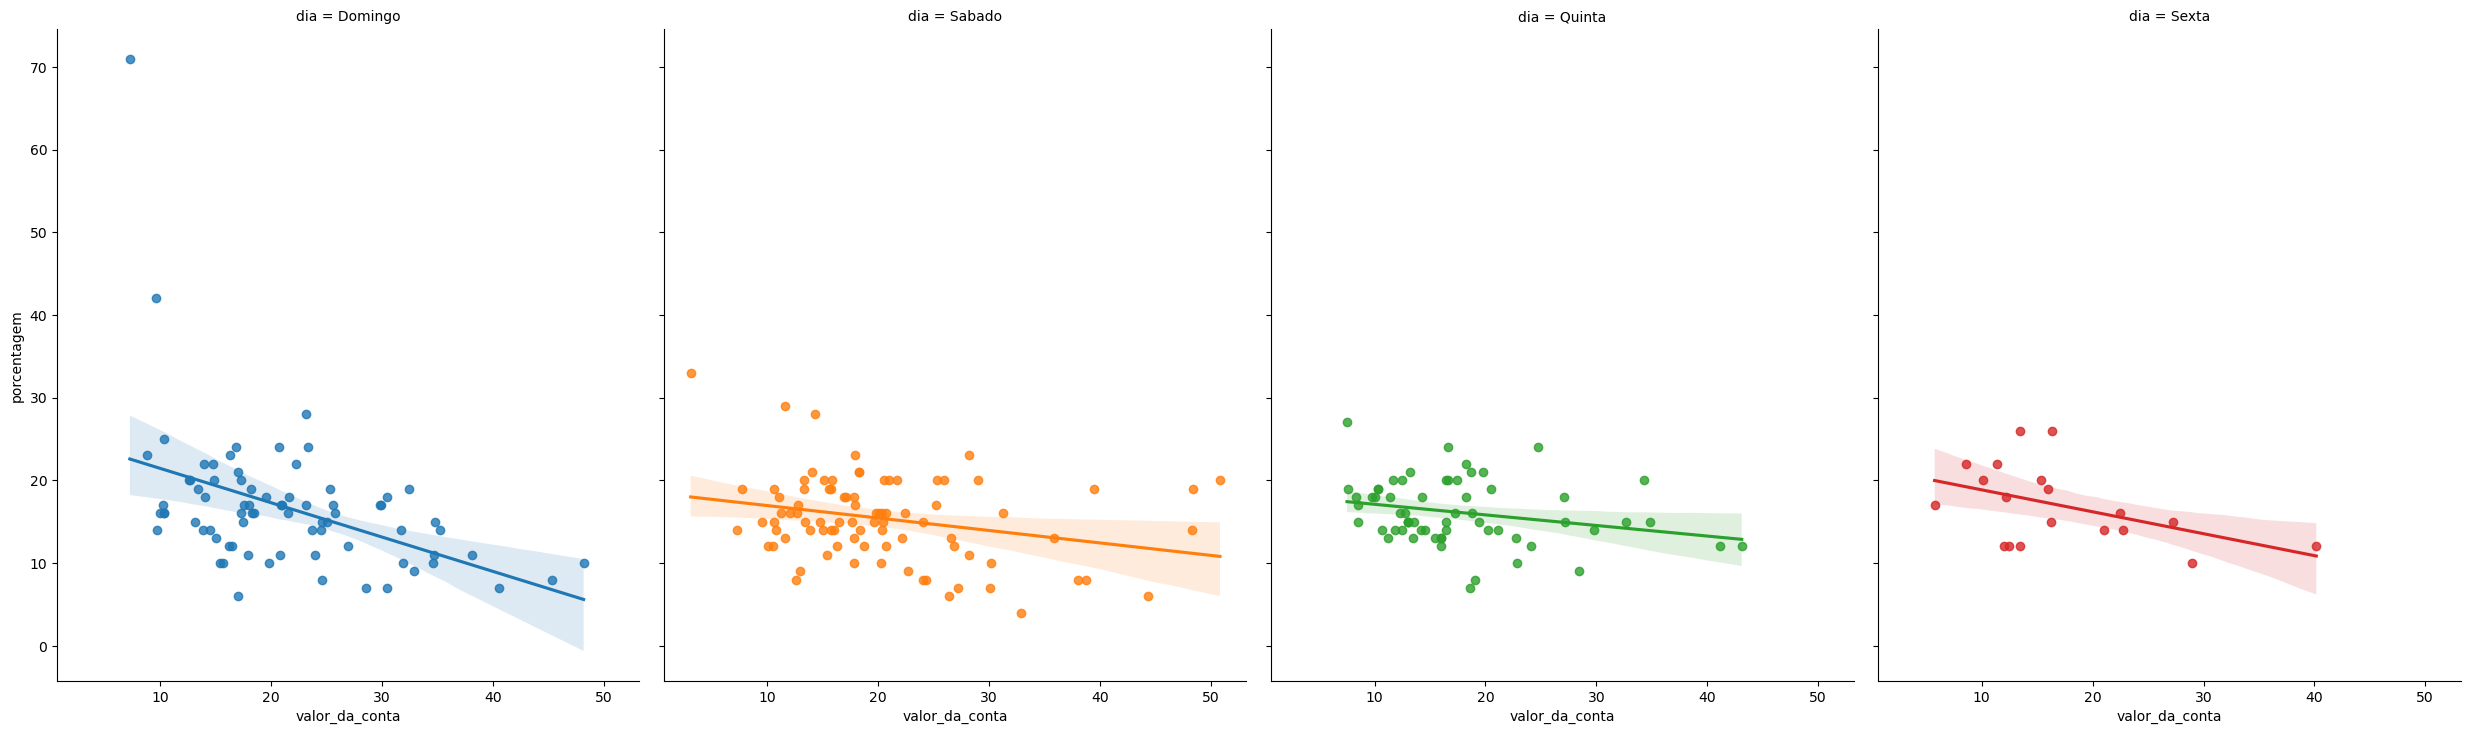

In [101]:
ax = sns.lmplot(x= 'valor_da_conta', y ='porcentagem', col = 'dia', hue='dia', data = df)
ax.figure.set_size_inches(25, 8)
plt.show()

#### Análise descritiva

In [103]:
media_geral = df.gorjeta.describe()

In [108]:
print(f'A média geral das gorjetas são : {round(media_geral[1], 3)}')

A média geral das gorjetas são : 2.998


In [114]:
df.groupby(['dia']).mean().round(2)

,valor_da_conta,gorjeta,pessoas,porcentagem
dia,,,,
Domingo,21.41,3.26,2.84,16.70
Quinta,17.68,2.77,2.45,16.11
Sabado,20.44,2.99,2.52,15.37
Sexta,17.15,2.73,2.11,16.95


In [158]:
estat = df.groupby(['dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]
estat

,valor_da_conta,gorjeta,porcentagem
dia,,,
Domingo,21.410000,3.255132,16.697368
Quinta,17.682742,2.771452,16.112903
Sabado,20.441379,2.993103,15.367816
Sexta,17.151579,2.734737,16.947368


In [161]:
estat = estat.reset_index()

In [162]:
estat

,dia,valor_da_conta,gorjeta,porcentagem
0,Domingo,21.410000,3.255132,16.697368
1,Quinta,17.682742,2.771452,16.112903
2,Sabado,20.441379,2.993103,15.367816
3,Sexta,17.151579,2.734737,16.947368


In [180]:
def media():
    ax = sns.barplot(x='dia', y ='gorjeta', data = estat)
    ax.set_title("Média da gorjeta")
    for i in ax.containers:
        ax.bar_label(i,)
    plt.show()

#### Frequências


In [125]:
dias = df.dia.value_counts()
dias = pd.DataFrame(dias)
dias

,dia
Sabado,87
Domingo,76
Quinta,62
Sexta,19


In [129]:
dias.rename(columns={'dia':'frequencia'}, inplace=True)

In [139]:
dias = dias.reset_index()

In [141]:
dias.rename(columns={'index':'dias'}, inplace=True)

In [142]:
dias

,dias,frequencia
0,Sabado,87
1,Domingo,76
2,Quinta,62
3,Sexta,19


In [190]:
def freq():
        ax = sns.barplot(x = 'dias', y ='frequencia', data = dias)
        ax.set_title("Distribuição de frequência")
        for i in ax.containers:
                ax.bar_label(i,)
        plt.show()

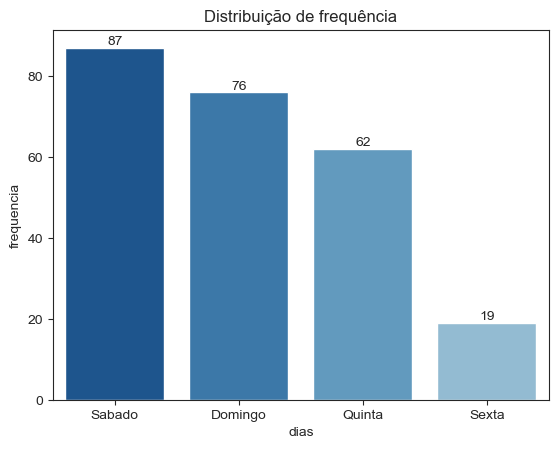

In [191]:
freq()

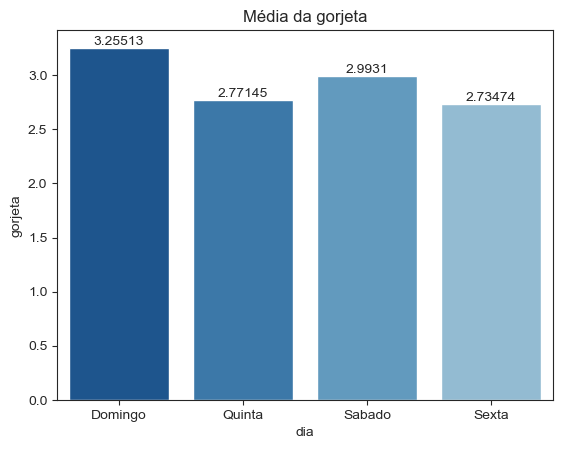

In [193]:
media()

* A média da gorjeta é maior no sábado e domingo, porém a frequência é maior no domingo.

### Teste de hipótese

$H0$ : A distribuição do valor da conta é a mesma nos dois grupos (sábado e domingo)

$H1$ : A distribuição do valor não é igual

In [206]:
domingo = df.query("dia == 'Domingo'").valor_da_conta
domingo

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
186    20.90
187    30.46
188    18.15
189    23.10
190    15.69
Name: valor_da_conta, Length: 76, dtype: float64

In [207]:
sabado =  df.query("dia == 'Sabado'").valor_da_conta
sabado

19     20.65
20     17.92
21     20.29
22     15.77
23     39.42
       ...  
238    35.83
239    29.03
240    27.18
241    22.67
242    17.82
Name: valor_da_conta, Length: 87, dtype: float64

In [210]:
r = ranksums(domingo, sabado)
r

RanksumsResult(statistic=0.9198084864360142, pvalue=0.3576728477868443)

In [213]:
print(f'O p_value é {round(r.pvalue,3)*100}% Assim, a hipótese alternativa é descartada')

O p_value é 35.8% Assim, a hipótese alternativa é descartada


* A distribuição do valor da conta no sabado e domingo é igual.

---

### Análise 4 - Hora do dia

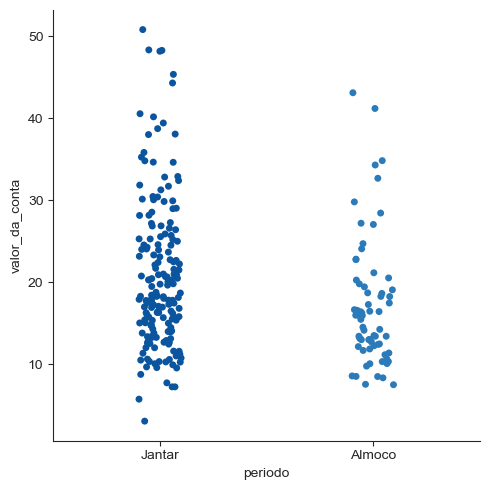

In [217]:
sns.catplot(x = 'periodo', y ='valor_da_conta', data = df)
plt.show()

* Visualmente, o valor da conta é maior no jantar.

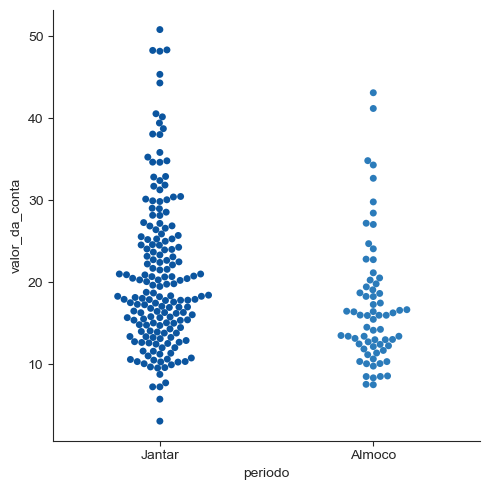

In [222]:
sns.catplot(x = 'periodo', y ='valor_da_conta', kind= 'swarm', data = df)
plt.show()

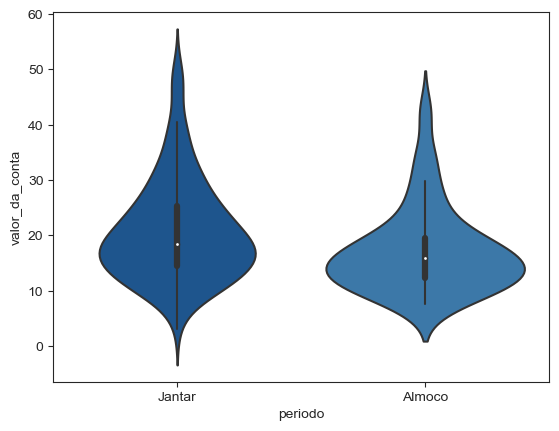

In [224]:
sns.violinplot(x ='periodo', y ='valor_da_conta', data = df)
plt.show()

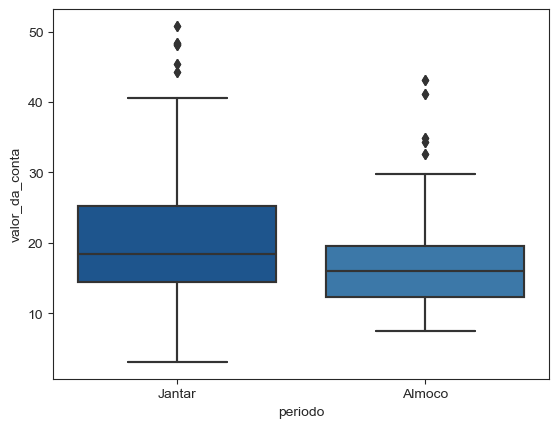

In [226]:
sns.boxplot(x ='periodo', y ='valor_da_conta', data = df)
plt.show()

In [231]:
almoco = df.query("periodo == 'Almoco'").valor_da_conta

In [237]:
jantar = df.query("periodo == 'Jantar'").valor_da_conta

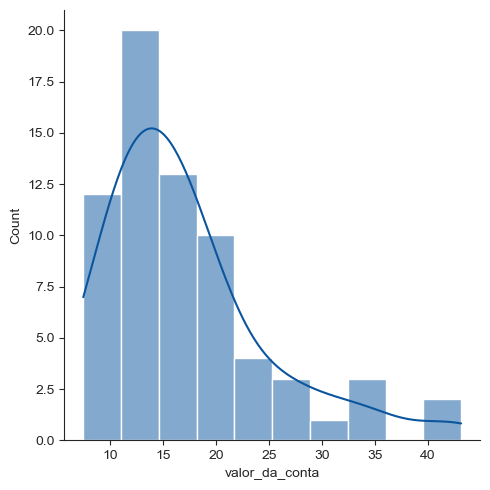

In [236]:
sns.displot(almoco, kde = True)
plt.show()

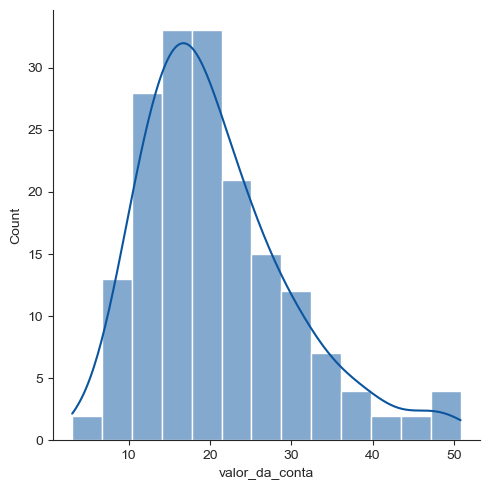

In [238]:
sns.displot(jantar, kde = True)
plt.show()

### Teste de hipóstese

$H0$ a distribuição do valor da conta é a mesma nos dois grupos (almoço e jantar)

$H1$ a distribuição do valor da conta não é a mesma nos dois grupos (almoço e jantar)

In [242]:
df.groupby(['periodo']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
periodo,,,
Almoco,17.168676,2.728088,16.397059
Jantar,20.797159,3.102670,15.977273


In [247]:
r = ranksums(jantar, almoco)

In [257]:
print(f'O pvalue tem o valor de {r.pvalue} Assim, aceitamos a hipótese alternativa.')

O pvalue tem o valor de 0.0011791039723641672 Assim, aceitamos a hipótese alternativa.
